In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dirpath_drive_train_images = '../../../02514/DRIVE/training/images'
dirpath_drive_train_labels= '../../../02514/DRIVE/training/1st_manual'
dirpath_drive_test_images = '../../../02514/DRIVE/test/images'
dirpath_ph2 = '../../../02514/PH2_Dataset_images'

In [ ]:
path_drive_train_images = [os.path.join(dirpath_drive_train_images, filename) for filename in os.listdir(dirpath_drive_train_images)]
path_drive_train_labels = [os.path.join(dirpath_drive_train_labels, filename) for filename in os.listdir(dirpath_drive_train_labels)]
path_drive_test_images = [os.path.join(dirpath_drive_test_images, filename) for filename in os.listdir(dirpath_drive_test_images)]

In [ ]:
#Print the number of images in the training set and the test set
print("Number of images in the training set: ", len(path_drive_train_images))
print("Number of images in the test set: ", len(path_drive_test_images))

#Print the size of an image in the training set
print("Size of an image in the training set: ", plt.imread(path_drive_train_images[14]).shape) 

In [ ]:
#Choose 5 random images from path_drive_train_images
random_idx = np.random.randint(0, len(path_drive_train_images), 5)
random_images = [path_drive_train_images[i] for i in random_idx]
random_labels = [path_drive_train_labels[i] for i in random_idx]

#plot the images
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, (image, label) in enumerate(zip(random_images, random_labels)):
    ax[0, i].imshow(plt.imread(image))
    ax[0, i].axis('off')
    ax[0, i].set_title(image.split('/')[-1])

    #labels are black and white images
    ax[1, i].imshow(plt.imread(label), cmap='gray')
    ax[1, i].axis('off')
    ax[1, i].set_title(label.split('/')[-1])
plt.tight_layout()

#save the figure in Images dir
plt.savefig('Images/data_inspect.png', transparent=True, bbox_inches='tight')

plt.show()


In [18]:
dirpath_ph2_images = [os.path.join(dirpath_ph2, dirname) for dirname in os.listdir(dirpath_ph2)]
samples = {}
for dirpath in dirpath_ph2_images:
    id = dirpath.split('/')[-1]
    samples[id] = {}
    samples[id]['lesion']  = []
    samples[id]['roi'] = []
    samples[id]['image'] = []
    for dirname in os.listdir(dirpath):
        dirpath_sample = os.path.join(dirpath, dirname)
        for filename in os.listdir(dirpath_sample):
            if "lesion" in dirname:
                samples[id]['lesion'].append(os.path.join(dirpath_sample, filename))
            elif "roi" in dirname:
                samples[id]['roi'].append(os.path.join(dirpath_sample, filename))
            elif "Dermoscopic_Image" in dirname:
                samples[id]['image'].append(os.path.join(dirpath_sample, filename))
            else:
                raise ValueError("Unknown file name: {}".format(filename))
    

In [52]:
sample = np.random.choice(list(samples.keys()), 1)[0]

#Print the number of samples in the PH2 dataset
print("Number of samples in the PH2 dataset: ", len(samples))

#Print size of a sample in the PH2 dataset
print("Size of a sample in the PH2 dataset: ", plt.imread(samples[sample]['image'][0]).shape)

Number of samples in the PH2 dataset:  200
Size of a sample in the PH2 dataset:  [[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 ...

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]]


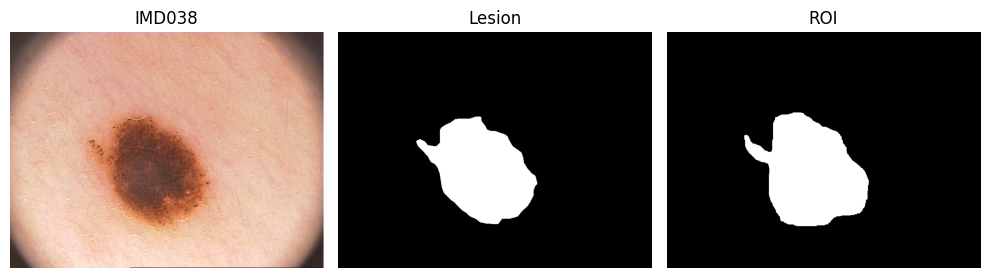

In [42]:

i =0
request_sample = 1
fig, ax = plt.subplots(request_sample, 3, figsize=(10, 10))
while i < request_sample:
    sample = np.random.choice(list(samples.keys()), 1)[0]
    if len(samples[sample]['roi']) == 0:
        continue
    
    if request_sample == 1:
        ax[0].imshow(plt.imread(samples[sample]['image'][0]))
        ax[0].axis('off')
        ax[0].set_title(sample)

        ax[1].imshow(plt.imread(samples[sample]['lesion'][0]))
        ax[1].axis('off')
        ax[1].set_title('Lesion')

        ax[2].imshow(plt.imread(samples[sample]['roi'][0]))
        ax[2].axis('off')
        ax[2].set_title('ROI')
        break

    ax[i, 0].imshow(plt.imread(samples[sample]['image'][0]))
    ax[i, 0].axis('off')
    ax[i, 0].set_title(sample)
    
    ax[i, 1].imshow(plt.imread(samples[sample]['lesion'][0]))
    ax[i, 1].axis('off')
    ax[i, 1].set_title('Lesion')
    
    ax[i, 2].imshow(plt.imread(samples[sample]['roi'][0]))
    ax[i, 2].axis('off')
    ax[i, 2].set_title('ROI')

    i += 1
plt.savefig('Images/data_inspect_ph2.png', transparent=True, bbox_inches='tight')
plt.tight_layout()


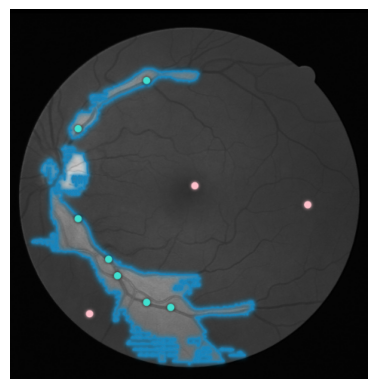

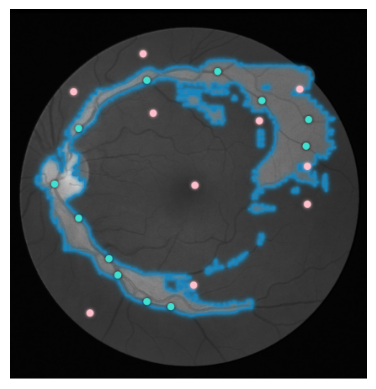

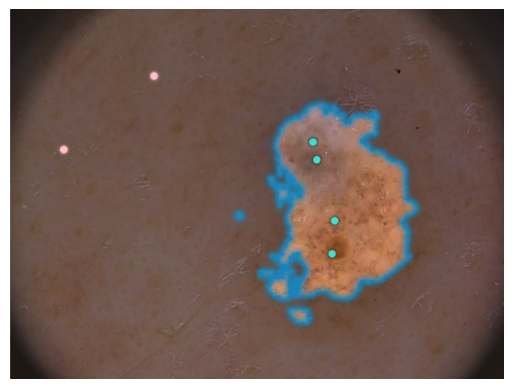

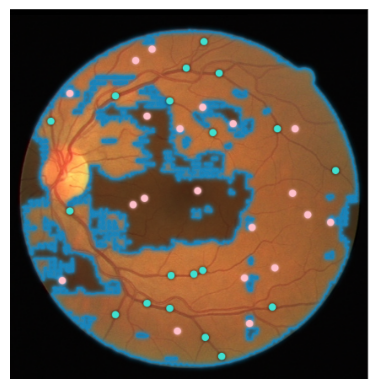

In [55]:
dirpath_segment_everything = 'segment_everything/images'
#Plot all 4 images in the segment_everything/images directory in one figure

